In [1]:
import lovelyplots
import matplotlib.pyplot as plt
plt.style.use('ipynb')
import wandb
api = wandb.Api()

In [5]:
accuracies = {}
steps = {}
for run in api.runs("symphony-generation/price_of_freedom"):
    if "tetris" in run.tags:
        hidden_lmax = run.config["hidden_lmax"]
        tensor_product_type = run.config["tensor_product_type"]

        history = run.scan_history()
        accuracies[(hidden_lmax, tensor_product_type)] = [x["accuracy"] for x in history]
        steps[(hidden_lmax, tensor_product_type)] = [x["step"] for x in history]

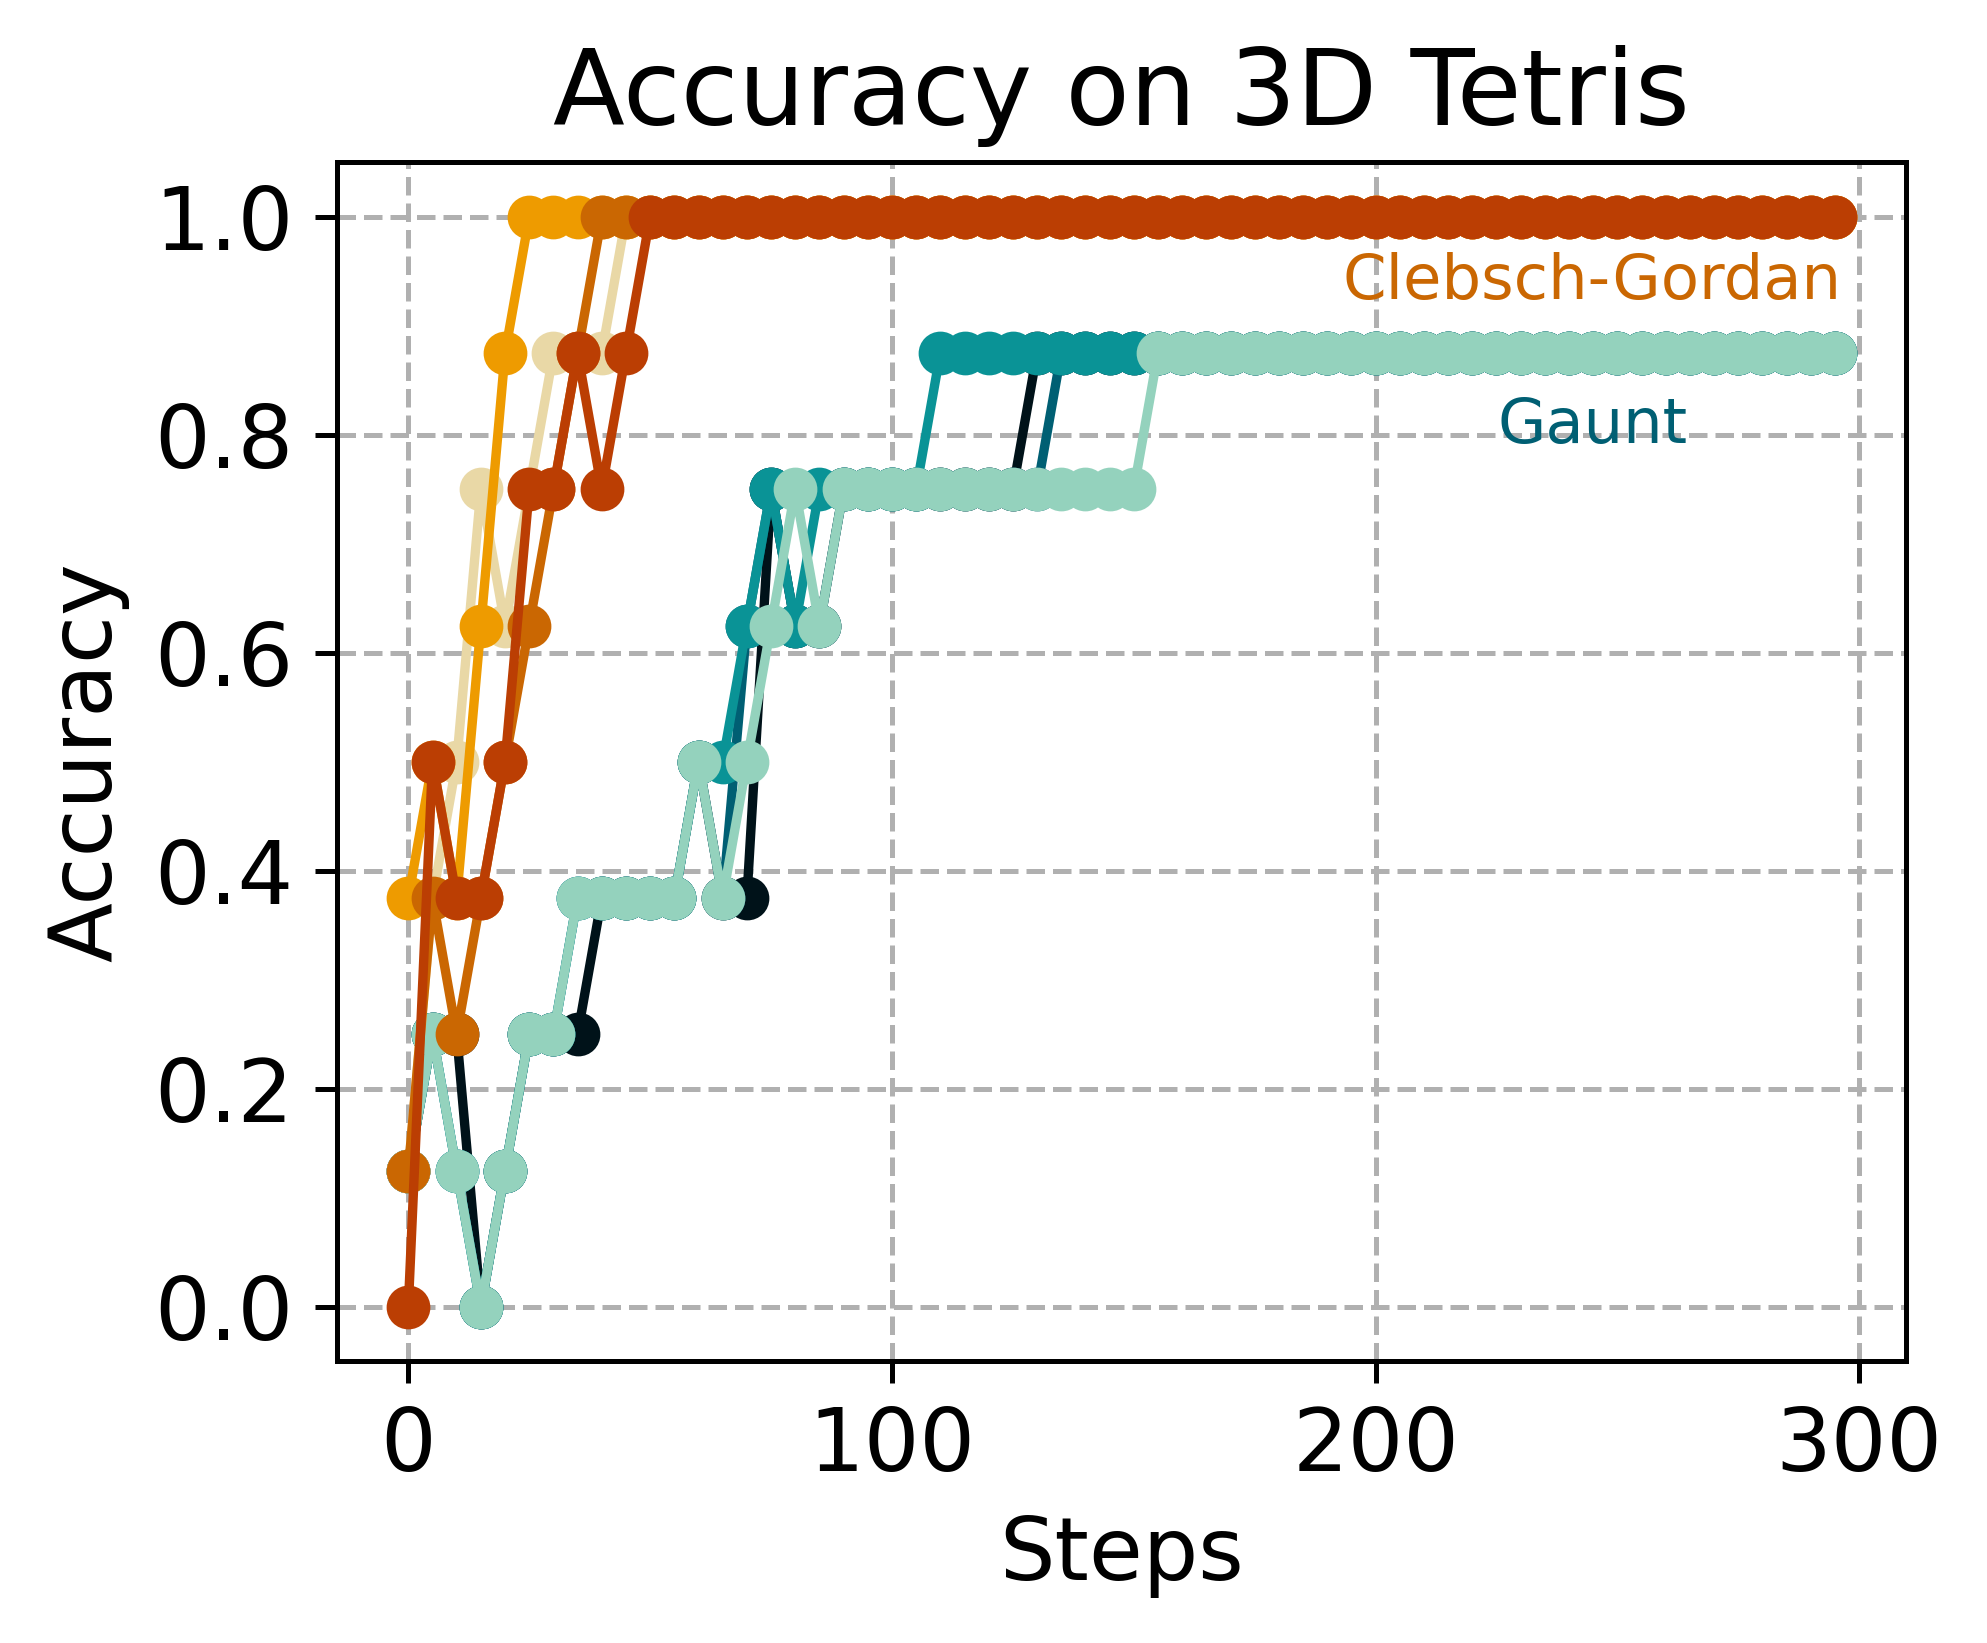

In [10]:
# Plot the accuracies
fig, ax = plt.subplots()
for (hidden_lmax, tensor_product_type) in accuracies:
    accs = accuracies[(hidden_lmax, tensor_product_type)]
    step = steps[(hidden_lmax, tensor_product_type)]
    ax.plot(step, accs, label=f"{hidden_lmax}, {tensor_product_type}")

ax.text(0.8, 0.78, "Gaunt", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, color='C1')
ax.text(0.8, 0.9, "Clebsch-Gordan", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, color='C6')
ax.ticklabel_format(style='plain')
ax.set_xlabel("Steps")
ax.set_ylabel("Accuracy")
ax.grid(linestyle='--')
ax.set_title("Accuracy on 3D Tetris")
plt.savefig("tetris.pdf")
plt.show()